In [13]:
import pandas as pd
url_original = "../data/raw/productivity-statistics-1978-2022.csv"
dataset = pd.read_csv(url_original)
dataset.columns = dataset.columns.str.lower()
columnas_numericas = dataset.select_dtypes(include='number').columns

dataset.drop_duplicates(subset=['series_reference'], keep="first", inplace=True)
cols = dataset.columns[dataset.isnull().mean() >= 0.5]
dataset.drop(columns=cols, inplace=True)
dataset.dropna(inplace=True)
dataset.drop(dataset[(dataset['data_value']) < 0].index, axis=0, inplace=True)
dataset.reset_index(drop=True, inplace=True)
def outliers(columnas_numericas):
    for columna in columnas_numericas:
        Q1 = dataset[columna].quantile(0.25)
        Q3 = dataset[columna].quantile(0.75)
        IQR = Q3 - Q1
        outlier_mask = (dataset[columna] < (Q1 - 1.5 * IQR)) | (dataset[columna] > (Q3 + 1.5 * IQR))
        return dataset[~outlier_mask]
dataset = outliers(columnas_numericas)

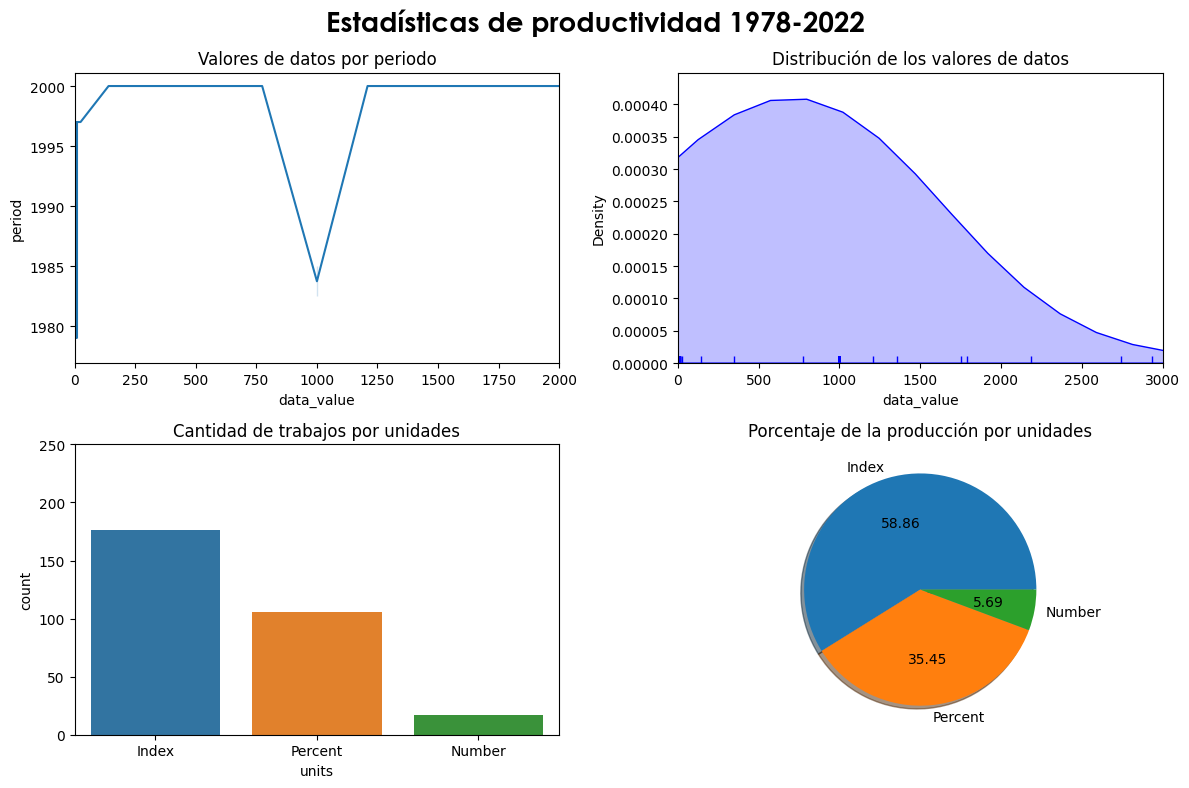

In [16]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

def graficar():
    """Graficar las estadisticas de productividad"""
    font = "Century Gothic"
    values_pie = dataset['units'].value_counts()
    labels_pie = values_pie.index
    
    fig = plt.figure('Estadísticas de productividad', figsize=(12, 8))
    axes = fig.subplots(nrows=2, ncols=2)
    fig.suptitle("Estadísticas de productividad 1978-2022", fontsize=20, fontweight='bold', fontname=font)
    axes[0, 0].set(title="Valores de datos por periodo", xlim=(0, 2000))
    axes[0, 1].set(title="Distribución de los valores de datos", xlim=(0, 3000))
    axes[1, 0].set(title="Cantidad de trabajos por unidades", ylim=(0, 250))
    axes[1, 1].set(title="Porcentaje de la producción por unidades")
    
    sns.lineplot(data=dataset, x='data_value', y='period', ax=axes[0, 0])
    
    sns.kdeplot(dataset['data_value'], fill=True, color='blue', ax=axes[0, 1])
    sns.rugplot(dataset['data_value'], color='blue', ax=axes[0, 1])
    
    sns.countplot(data=dataset, x='units', ax=axes[1, 0])
    
    axes[1, 1].pie(x=values_pie, labels=labels_pie, autopct='%.2f', shadow=True)
    
    fig.tight_layout()
    plt.show()
graficar()